<a href="https://colab.research.google.com/github/manuprasad-cybera/Melanoma_Detection_Assignment/blob/main/Melanoma_Detection_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
## mounting the google drive to colab
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [6]:
## train and test dataset path on google drive
data_dir_train = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [7]:
images_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(images_count_train)
images_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(images_count_test)

2239
118


**Load using the kears**

# create dataset

### Use 80% of the images for training, and 20% for validation.

In [8]:
## defining the parameter for loader :

batch_size = 32
img_height = 180
img_width = 180

In [9]:
## writing our train dataset here
## creating the dataset using using tf.keras.preprocessing.image_dataset_from_directory
train_data_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## writing out validation dataset here
## creating the dataset using using tf.keras.preprocessing.image_dataset_from_directory
val_data_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# Make a list of every class of skin cancer and keep it organized.
# These datasets' class_names field contains the class names.
# In alphabetical order, these match the directory names.

class_names = train_data_ds.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### Visualizing the data
#### Writing code to display a single example of each of the dataset's nine classifications

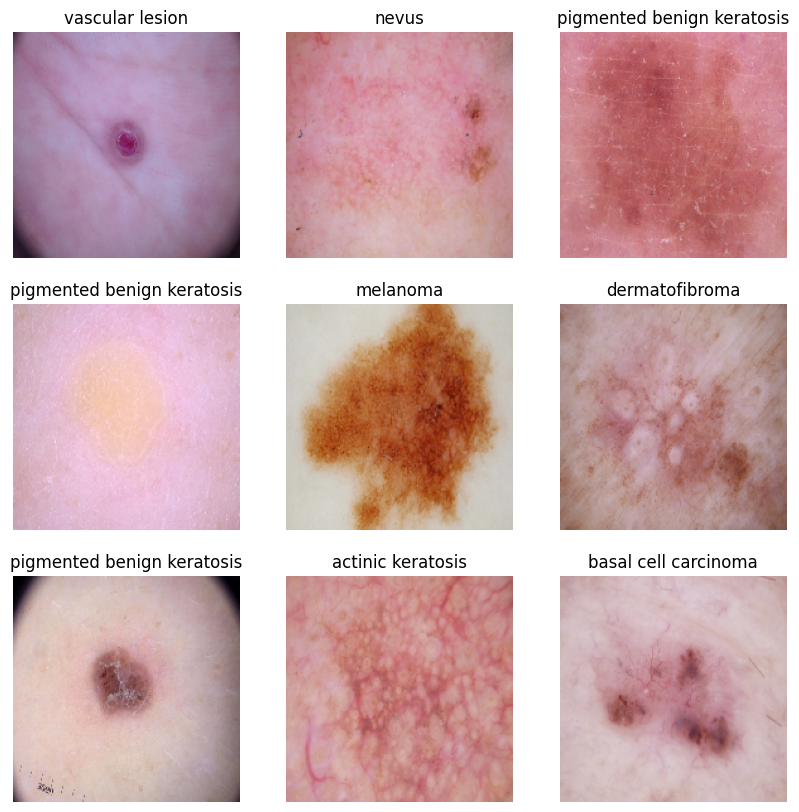

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10, 10))

# Iterate through the first batch of the training dataset
for images, labels in train_data_ds.take(1):
    # Display 9 images from the batch
    for i in range(9):
        # Create a subplot grid of 3 rows and 3 columns
        ax = plt.subplot(3, 3, i + 1)
        # Display the image
        plt.imshow(images[i].numpy().astype("uint8"))
        # Set the title to the class name
        plt.title(class_names[labels[i]])
        # Hide the axis ticks and labels
        plt.axis("off")
# Show the plot with the images and titles
plt.show()

### The shape `(32, 180, 180, 3)` is represented by the tensor `image_batch`. This is a collection of 32 pictures with the dimensions `180x180x3` (the final dimension denotes RGB color channels). The labels for the 32 photos are represented by the `label_batch`, which is a tensor of the shape `(32,)`.

### `Dataset.cache()` loads the photos from disk during the first epoch and stores them in memory.

### `Dataset.prefetch()` overlaps model execution and data preprocessing during training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_data_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_data_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
## writing out validation dataset here
## creating the dataset using using tf.keras.preprocessing.image_dataset_from_directory
val_data_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


# Creating a model

### Construct a CNN model that can reliably identify the dataset's nine classifications. To normalize pixel values between 0 and 1, use ```layers.experimental.preprocessing.Rescaling```. The RGB channel values fall between 0 and 255. For a neural network, this is not optimal. Standardizing values in the `[0, 1]` range is a good idea in this case.

In [15]:
## model -1
## number of target lables = 9

target_lable = 9

# Replace layers.experimental.preprocessing.Rescaling
# with tf.keras.layers.Rescaling (or tf.keras.layers.experimental.preprocessing.Rescaling if available)
model = Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_lable)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# compile the model

### chossing the appropriate optimizer and loss function

In [16]:
## choosing the optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
## summury
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [18]:
%%time
epochs = 20
history = model.fit(
  train_data_ds,
  validation_data=val_data_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 285s 5s/step - accuracy: 0.2250 - loss: 2.0817 - val_accuracy: 0.3244 - val_loss: 1.8486
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 343ms/step - accuracy: 0.3437 - loss: 1.7749 - val_accuracy: 0.3937 - val_loss: 1.6549
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 334ms/step - accuracy: 0.4421 - loss: 1.5339 - val_accuracy: 0.4944 - val_loss: 1.4555
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 352ms/step - accuracy: 0.5205 - loss: 1.3297 - val_accuracy: 0.5168 - val_loss: 1.3884
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 350ms/step - accuracy: 0.5612 - loss: 1.2320 - val_accuracy: 0.4519 - val_loss: 1.4632
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 350ms/step - accuracy: 0.5616 - loss: 1.1849 - val_accuracy: 0.5190 - val_loss: 1.4297
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 308ms/step - accuracy: 0.6080 - loss: 1.0981 - val_accuracy: 0.5190 - val_loss: 1.4763
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 354ms/step - accuracy: 0.6194 - loss: 1.0806 - val_accura

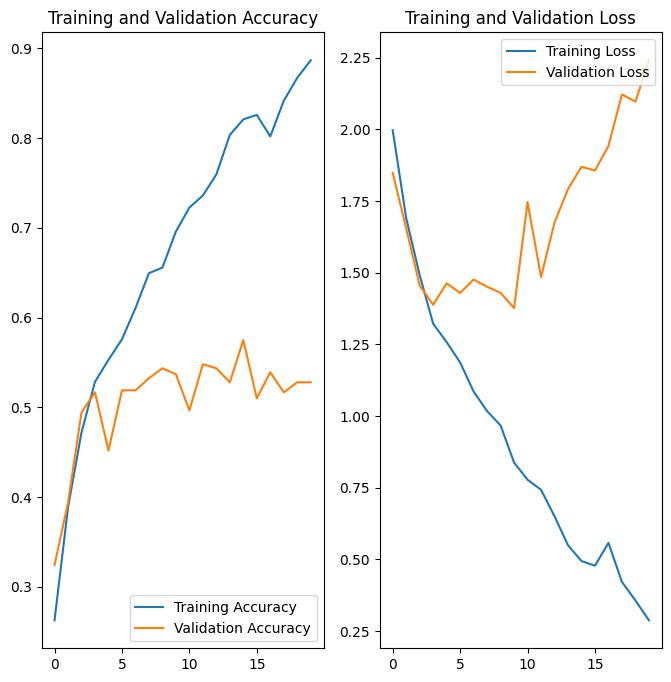

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Fix: Use the correct number of epochs for the x-axis range
epochs_range = range(len(acc))  # Or len(loss), len(val_acc), etc.

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### After the model has been fitted, write your results and check for signs of overfitting or underfitting.

### Write your findings here

Observations:

1. The model's validation accuracy continuously hovers around 55%, but its training accuracy steadily rises up to 90%.

2. A high training accuracy indicates that the data's noise has been successfully captured by the model. Its weak performance on validation data, however, suggests that it lacks generalizability.

3. The existence of overfitting is confirmed by these findings. Augmentation techniques will be used to solve this problem. Due to the restricted amount of training data available, the model will be trained using new samples created by making little changes to the existing data (e.g., flipping images horizontally or vertically, rotating images slightly, etc.).

In [20]:
### Select a suitable data augmentation approach after examining the model fit history for the existence of underfit or overfit.

augmentation_data = keras.Sequential([
                                      layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.1),
])

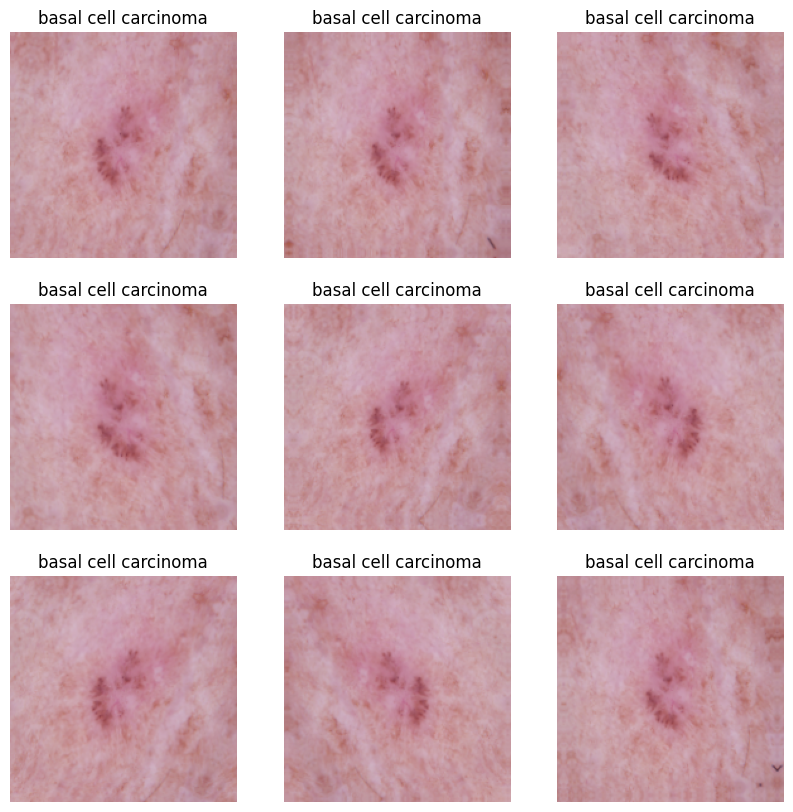

In [21]:
# Visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = augmentation_data(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

 creating a model - 2, compile and train the model


In [22]:
model = Sequential([
  augmentation_data,
  tf.keras.layers.Rescaling(1./255),  # Change to tf.keras.layers.Rescaling
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_lable) # Change target_labels to target_lable
])

# Compliing the model

In [23]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the Model

In [24]:
%%time
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_data_ds,
  validation_data=val_data_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 328ms/step - accuracy: 0.2213 - loss: 2.1143 - val_accuracy: 0.3356 - val_loss: 1.8288
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 350ms/step - accuracy: 0.3250 - loss: 1.7627 - val_accuracy: 0.4161 - val_loss: 1.6335
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 312ms/step - accuracy: 0.4130 - loss: 1.5560 - val_accuracy: 0.4877 - val_loss: 1.4842
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 320ms/step - accuracy: 0.4803 - loss: 1.4235 - val_accuracy: 0.5213 - val_loss: 1.4245
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 309ms/step - accuracy: 0.5231 - loss: 1.3593 - val_accuracy: 0.5235 - val_loss: 1.4168
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 311ms/step - accuracy: 0.5344 - loss: 1.3238 - val_accuracy: 0.4899 - val_loss: 1.4400
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 337ms/step - accuracy: 0.5236 - loss: 1.3320 - val_accuracy: 0.5526 - val_loss: 1.3501
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 313ms/step - accuracy: 0.5544 - loss: 1.2261 - val_accu

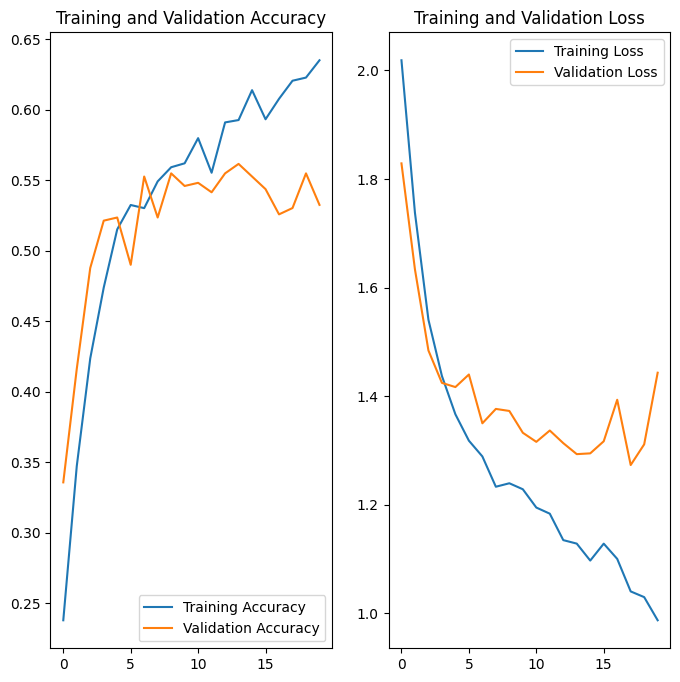

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### After the model has been fitted, write down your results and check for signs of overfitting or underfitting. Do you believe that the current model run is better than the last one?

Observations:

1. Overfitting has been successfully addressed by utilizing augmented data.

2. The aforementioned model's training and validation accuracy ranges similarly.

3. The model is now displaying underfitting, as evidenced by the poor performance of both the training and validation data.

#### Determine the training dataset's class distribution.
#### **Background: ** Real-world datasets frequently exhibit class imbalance, with one class having a disproportionately higher number of samples than the others. A class imbalance may negatively impact the quality of the finished model. Therefore, determining the data's class distribution becomes crucial as a sanity check.

In [26]:
import pathlib

# Assuming data_dir_train is a pathlib.Path object
# data_dir_train = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

# Find all image paths
images_path_list = [str(path) for path in data_dir_train.rglob("*.jpg")]

# Extract class labels (lesions)
lesions_list = [path.parent.name for path in data_dir_train.rglob("*.jpg")]

# Print the total number of labels
print(len(lesions_list))

2239


In [27]:
# Retrieve the class label and image path from a dictionary
image_dict = {}
for i in range(len(images_path_list)):
  image_dict[images_path_list[i]] = lesions_list[i]
print(list(image_dict.items())[:5])

[('/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025957.jpg', 'actinic keratosis'), ('/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026149.jpg', 'actinic keratosis'), ('/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026575.jpg', 'actinic keratosis'), ('/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025953.jpg', 'actinic keratosis'), ('/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026457.jpg', 'actinic keratosis')]


In [28]:
lesions_df = pd.DataFrame({'Image Path': images_path_list, 'Label': lesions_list})
lesions_df.head()

,Image Path,Label
0,/content/gdrive/My Drive/CNN_assignment/Skin c...,actinic keratosis
1,/content/gdrive/My Drive/CNN_assignment/Skin c...,actinic keratosis
2,/content/gdrive/My Drive/CNN_assignment/Skin c...,actinic keratosis
3,/content/gdrive/My Drive/CNN_assignment/Skin c...,actinic keratosis
4,/content/gdrive/My Drive/CNN_assignment/Skin c...,actinic keratosis


In [29]:
class_distribution = lesions_df['Label'].value_counts()
print(class_distribution)

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64


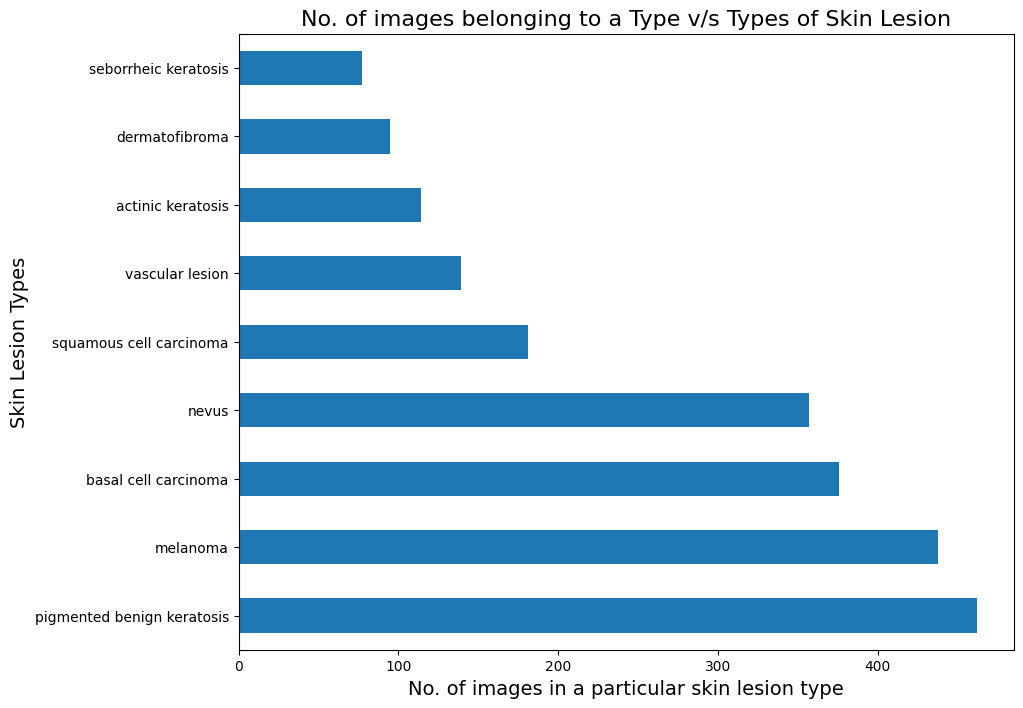

In [30]:
class_counts = lesions_df['Label'].value_counts()
plt.figure(figsize=(10, 8))
class_counts.plot.barh()
plt.title('No. of images belonging to a Type v/s Types of Skin Lesion', fontsize=16)
plt.xlabel('No. of images in a particular skin lesion type', fontsize=14)
plt.ylabel('Skin Lesion Types', fontsize=14)
plt.show()

In [31]:
normalized_distribution = lesions_df['Label'].value_counts(normalize=True) * 100
rounded_distribution = normalized_distribution.round(2)
rounded_distribution

,proportion
Label,
pigmented benign keratosis,20.63
melanoma,19.56
basal cell carcinoma,16.79
nevus,15.94
squamous cell carcinoma,8.08
vascular lesion,6.21
actinic keratosis,5.09
dermatofibroma,4.24
seborrheic keratosis,3.44


#### Record your results here:
####-What is the class with the fewest samples?
####-In terms of the proportionate number of samples, which classifications dominate the data?



Observations:

1. The training data clearly shows a class imbalance.

2. The least percentage of samples, or about **3.44%**, belong to the class **"seborrheic keratosis"**.

3. With **"melanoma"** and **"pigmented benign keratosis"** accounting for roughly **19.56%** and **20.63%** of the data, respectively, these two classifications greatly outnumber the others.

### Address the disparity in class
#### **Background: ** To ensure that no class has too few samples, you can add more samples to all of the classes using the `Augmentor` (https://augmentor.readthedocs.io/en/master/) Python module.

In [32]:
!pip install Augmentor

The general steps to use `Augmentor` are as follows:

1. Create a `Pipeline` object that points to a directory that holds your original batch of image data.
2. Using your `Pipeline` object, provide a number of operations to be carried out on this data collection.
3. Use the `Pipeline} `sample()` method to carry out these actions.



In [33]:
path_to_training_dataset = str(data_dir_train) + '/'

import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A5B40157FD0>: 100%|██████████| 500/500 [00:22<00:00, 21.83 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A5B40134FD0>: 100%|██████████| 500/500 [00:17<00:00, 28.33 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A5ABFE14650>: 100%|██████████| 500/500 [00:18<00:00, 27.32 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A5B202F8790>: 100%|██████████| 500/500 [01:27<00:00,  5.72 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1504x1129 at 0x7A5B40F89590>: 100%|██████████| 500/500 [01:24<00:00,  5.95 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A5ABFE45210>: 100%|██████████| 500/500 [00:18<00:00, 27.00 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7A5ACA37C390>: 100%|██████████| 500/500 [00:37<00:00, 13.46 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A5B41346F90>: 100%|██████████| 500/500 [00:19<00:00, 25.69 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A5ABFE4E550>: 100%|██████████| 500/500 [00:18<00:00, 27.02 Samples/s]


The augmented photos have been saved by Augmentor in the output subdirectory of every skin cancer type subdirectory. Let's examine the whole number of augmented photographs.

In [34]:
import pathlib

# Path to the training dataset directory
data_dir_train = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

# Count images within the "output" subdirectories
image_count_train = 0
for class_dir in data_dir_train.iterdir():  # Iterate through class directories
    output_dir = class_dir / "output"  # Path to the output directory for this class
    if output_dir.exists():  # Check if output directory exists
        image_count_train += len(list(output_dir.glob("*.jpg")))

print(f"Total number of images after augmentation: {image_count_train}")

Total number of images after augmentation: 4500


In [35]:
import pathlib

# Path to the training dataset directory
data_dir_train = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

# Extract augmented image paths using pathlib
path_list_new = [
    str(path)  # Convert pathlib.Path to string
    for class_dir in data_dir_train.iterdir()  # Iterate through class directories
    for path in (class_dir / "output").glob("*.jpg")  # Glob for images in output subdirectory
    if (class_dir / "output").exists()  # Check if output directory exists
]

path_list_new[:5]  # Print the first 5 paths

['/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033811.jpg_9e5423c4-726c-49da-a500-abb5b16d8c31.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026650.jpg_c5eca20c-cc2e-4b7f-a9f5-e38024bc412f.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031381.jpg_690243ec-4d38-447e-860f-846296da2953.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028190.jpg_1e9ed69c-4318-4752-a751-e38a0706e4a0.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/ac

In [36]:
import pathlib

# Path to the training dataset directory
data_dir_train = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

# Extract lesion types (class labels) using pathlib
lesion_list_new = [
    path.parent.parent.name  # Extract grandparent directory name (class label)
    for class_dir in data_dir_train.iterdir()  # Iterate through class directories
    for path in (class_dir / "output").glob("*.jpg")  # Glob for images in output subdirectory
    if (class_dir / "output").exists()  # Check if output directory exists
]

lesion_list_new[:5]  # Print the first 5 lesion types

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [38]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [39]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Image Path','Label'])
new_df = pd.concat([lesions_df, df2], ignore_index=True)
new_df.shape

(6739, 2)

In [40]:
# image paths and labels in a new df
new_df.head()

,Image Path,Label
0,/content/gdrive/My Drive/CNN_assignment/Skin c...,actinic keratosis
1,/content/gdrive/My Drive/CNN_assignment/Skin c...,actinic keratosis
2,/content/gdrive/My Drive/CNN_assignment/Skin c...,actinic keratosis
3,/content/gdrive/My Drive/CNN_assignment/Skin c...,actinic keratosis
4,/content/gdrive/My Drive/CNN_assignment/Skin c...,actinic keratosis


In [41]:
# Inspecting the classes after adding 500 samples per label
new_df['Label'].value_counts()

,count
Label,
pigmented benign keratosis,962
melanoma,938
basal cell carcinoma,876
nevus,857
squamous cell carcinoma,681
vascular lesion,639
actinic keratosis,614
dermatofibroma,595
seborrheic keratosis,577


In [42]:
# After adding 500 samples per label, examining the classes (percentage of age)

round(new_df['Label'].value_counts(normalize=True)*100, 2)

,proportion
Label,
pigmented benign keratosis,14.28
melanoma,13.92
basal cell carcinoma,13.00
nevus,12.72
squamous cell carcinoma,10.11
vascular lesion,9.48
actinic keratosis,9.11
dermatofibroma,8.83
seborrheic keratosis,8.56


In order to preserve some class balance, we have now added 500 photos to each class. If we wish to enhance the training process, we might include additional visuals.

## Use the Augmentor-generated data to train the model.

In [43]:
batch_size = 32
img_height = 180
img_width = 180

**creating training dataset and validating**

In [44]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 3147 files for validation.


In [45]:
## creating a model
target_lable = 9

model = Sequential([
  augmentation_data,
  tf.keras.layers.Rescaling(1./255),  # Change to tf.keras.layers.Rescaling
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_lable) # Make sure target_lable is defined and has the correct value
])

In [46]:
## complie your model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train your model

In [47]:
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 42s 223ms/step - accuracy: 0.2950 - loss: 4.0573 - val_accuracy: 0.2058 - val_loss: 15.8033
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 35s 197ms/step - accuracy: 0.3755 - loss: 1.6655 - val_accuracy: 0.2953 - val_loss: 5.0228
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 34s 202ms/step - accuracy: 0.4124 - loss: 1.5198 - val_accuracy: 0.2707 - val_loss: 3.1874
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 33s 194ms/step - accuracy: 0.4566 - loss: 1.3995 - val_accuracy: 0.4362 - val_loss: 1.4161
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 198ms/step - accuracy: 0.4644 - loss: 1.3996 - val_accuracy: 0.3826 - val_loss: 1.6988
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 201ms/step - accuracy: 0.4925 - loss: 1.2851 - val_accuracy: 0.3468 - val_loss: 2.1876
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 203ms/step - accuracy: 0.5258 - loss: 1.2254 - val_accuracy: 0.5123 - val_loss: 1.3203
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 199ms/step - accuracy: 0.5386 - loss: 

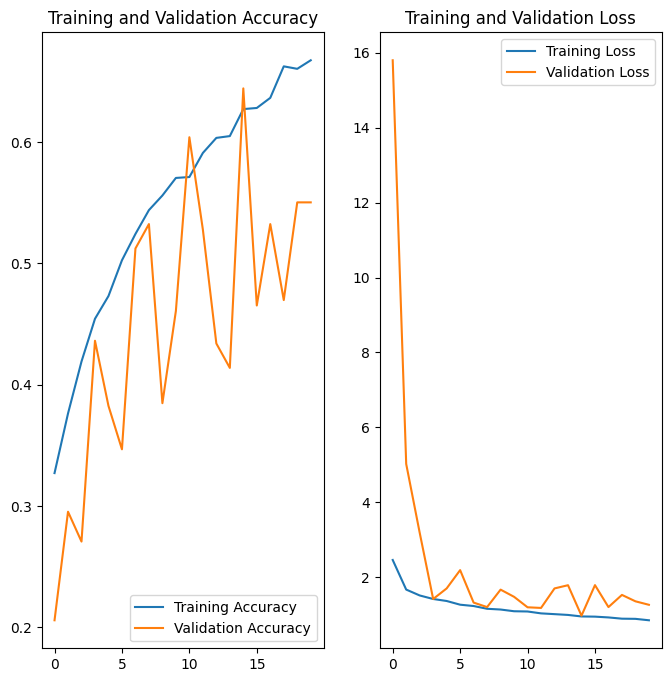

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Observations:

1. Training and validation accuracy increased slightly when batch normalization was applied to the model.
2. The goal of creating a different model without batch normalization is to look at potential accuracy gains.

**Making a different model (without batch normalization)**

In [50]:
# create the model
# Replace 'layers.experimental.preprocessing.Rescaling' with 'tf.keras.layers.Rescaling'
# or 'tf.keras.layers.experimental.preprocessing.Rescaling' if available in your version
model = Sequential([
  augmentation_data,
  tf.keras.layers.Rescaling(1./255),  # Changed to tf.keras.layers.Rescaling
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_lable) # Assuming target_lable is defined earlier
])

In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# ModelCheckpoint callback is employed alongside the model.fit() training process to periodically save the model
# or its weights (in a checkpoint file)
checkpoint = ModelCheckpoint("model.keras", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)

# Early stop the training when a monitored metric ceases to show improvement
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", verbose=1)

In [52]:
%%time
# train the model
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[checkpoint, earlystop]
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.2267 - loss: 2.0857
Epoch 1: val_accuracy improved from -inf to 0.41611, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 34s 189ms/step - accuracy: 0.2270 - loss: 2.0845 - val_accuracy: 0.4161 - val_loss: 1.7073
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.3947 - loss: 1.5983
Epoch 2: val_accuracy improved from 0.41611 to 0.53468, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - accuracy: 0.3948 - loss: 1.5981 - val_accuracy: 0.5347 - val_loss: 1.3804
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.4614 - loss: 1.4424
Epoch 3: val_accuracy did not improve from 0.53468
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 187ms/step - accuracy: 0.4613 - loss: 1.4424 - val_accuracy: 0.5302 - val_loss: 1.3305
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.4854 - loss: 1.3593
Epoch 4: val_accuracy did not improve from 0.53468
169/169 ━━━━━━━━━━━━━

In [53]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,969,405 (45.66 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,979,604 (30.44 MB)

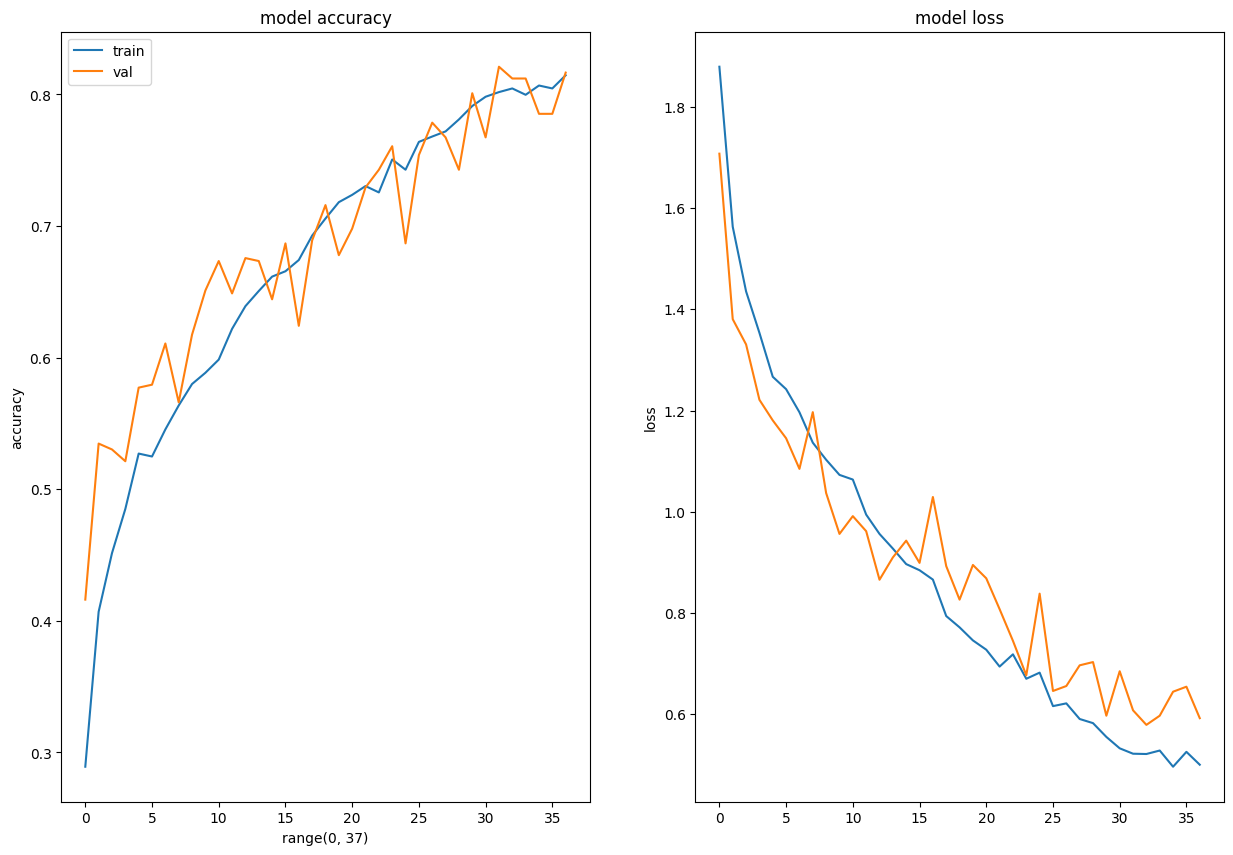

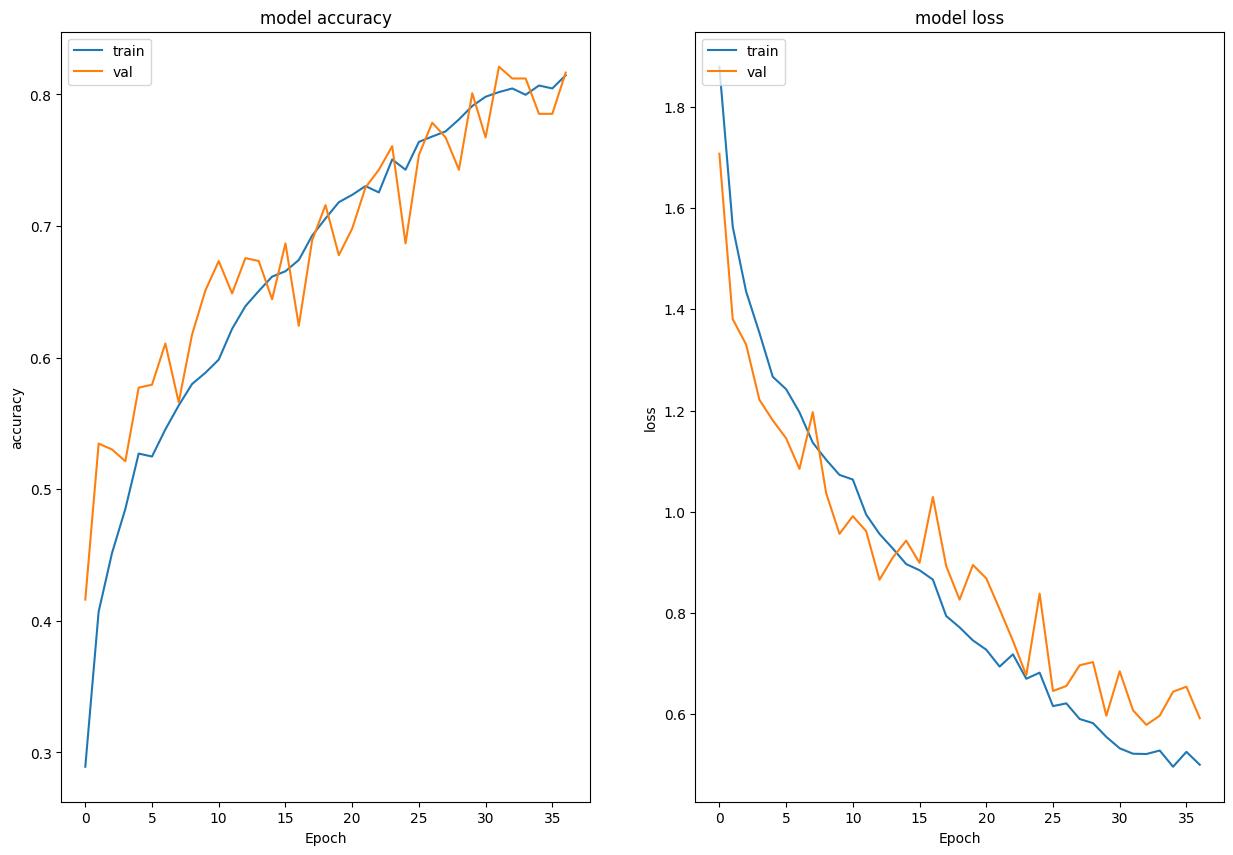

In [55]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch') #Fixed: replaced epochs_range with 'Epoch'
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch') #Fixed: replaced epochs_range with 'Epoch'
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Examine your findings here. Have you eliminated overfitting or underfitting? Was class rebalancing beneficial?




***Observations:***

1. The ultimate model showcases well-balanced performance, displaying no signs of underfitting or overfitting.

2. The implementation of class rebalancing has notably enhanced the model's performance across both training and validation datasets.

3. Following 37 epochs, the final model attains an accuracy of 84% on the training set and approximately 79% on the validation set.

4. The narrow divergence between training and validation accuracies underscores the robust generalization capability of the final CNN model.

5. The addition of batch normalization failed to enhance both training and validation accuracy.

### Model Evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Actual Class: basal cell carcinoma
Predicted Class: pigmented benign keratosis


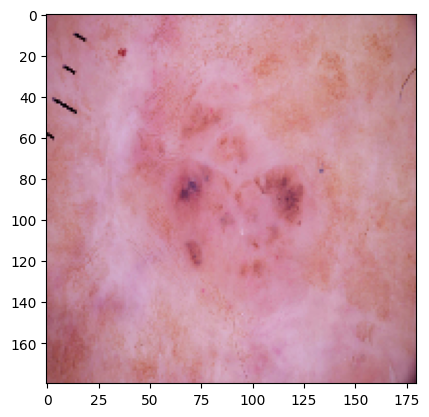

In [57]:
# Evaluating our model on one of the instances in the test set

from tensorflow.keras.preprocessing.image import load_img
import glob # Import the glob module

image_path_test = os.path.join(data_dir_test, class_names[1], '*')
test_image = glob.glob(image_path_test) # Use glob.glob to call the function
test_image = load_img(test_image[-1], target_size=(180, 180, 3))
plt.imshow(test_image)
plt.grid(False)

img = np.expand_dims(test_image, axis=0)
predicted = model.predict(img)
predicted = np.argmax(predicted)
predicted_class = class_names[predicted]
print("Actual Class: " + class_names[1] +'\n'+ "Predicted Class: " + predicted_class)